In [5]:
class Node():
    def __init__(self, data=None):
        self.data = data
        self.children = []
    def __repr__(self, indent=""):
        return (indent + repr(self.data) + "\n"
                + "".join(child.__repr__(indent+"  ") 
                          for child in self.children))

In [6]:
def create_tree(edges):
    # Get all the unique keys into a set
    node_keys = set(key for keys in edges for key in keys)
    # Create a Node instance for each of them, keyed by their key in a dict:
    nodes = { key: Node(key) for key in node_keys }
    # Populate the children attributes from the edges
    for parent, child in edges:
        nodes[parent].children.append(nodes[child])
        # Remove the child from the set, so we will be left over with the root
        node_keys.remove(child)
    # Get the root from the set, which at this point should only have one member
    for root_key in node_keys:  # Just need one
        return nodes[root_key]

In [7]:
edges = [[1,4],[1,3],[1,2],[3,5],[3,6],[3,7]]
root = create_tree(edges)

In [8]:
print(root)

1
  4
  3
    5
    6
    7
  2



In [9]:
def get_root(dag):
    candidates = set(parent for (parent,_) in dag)
    for _,child in dag:
        candidates.discard(child)
    assert(len(candidates) == 1) # or handle len(candidates) == 0 and len(candidates) > 1 with an if/elif/else
    return candidates.pop()

In [12]:
import numpy as np

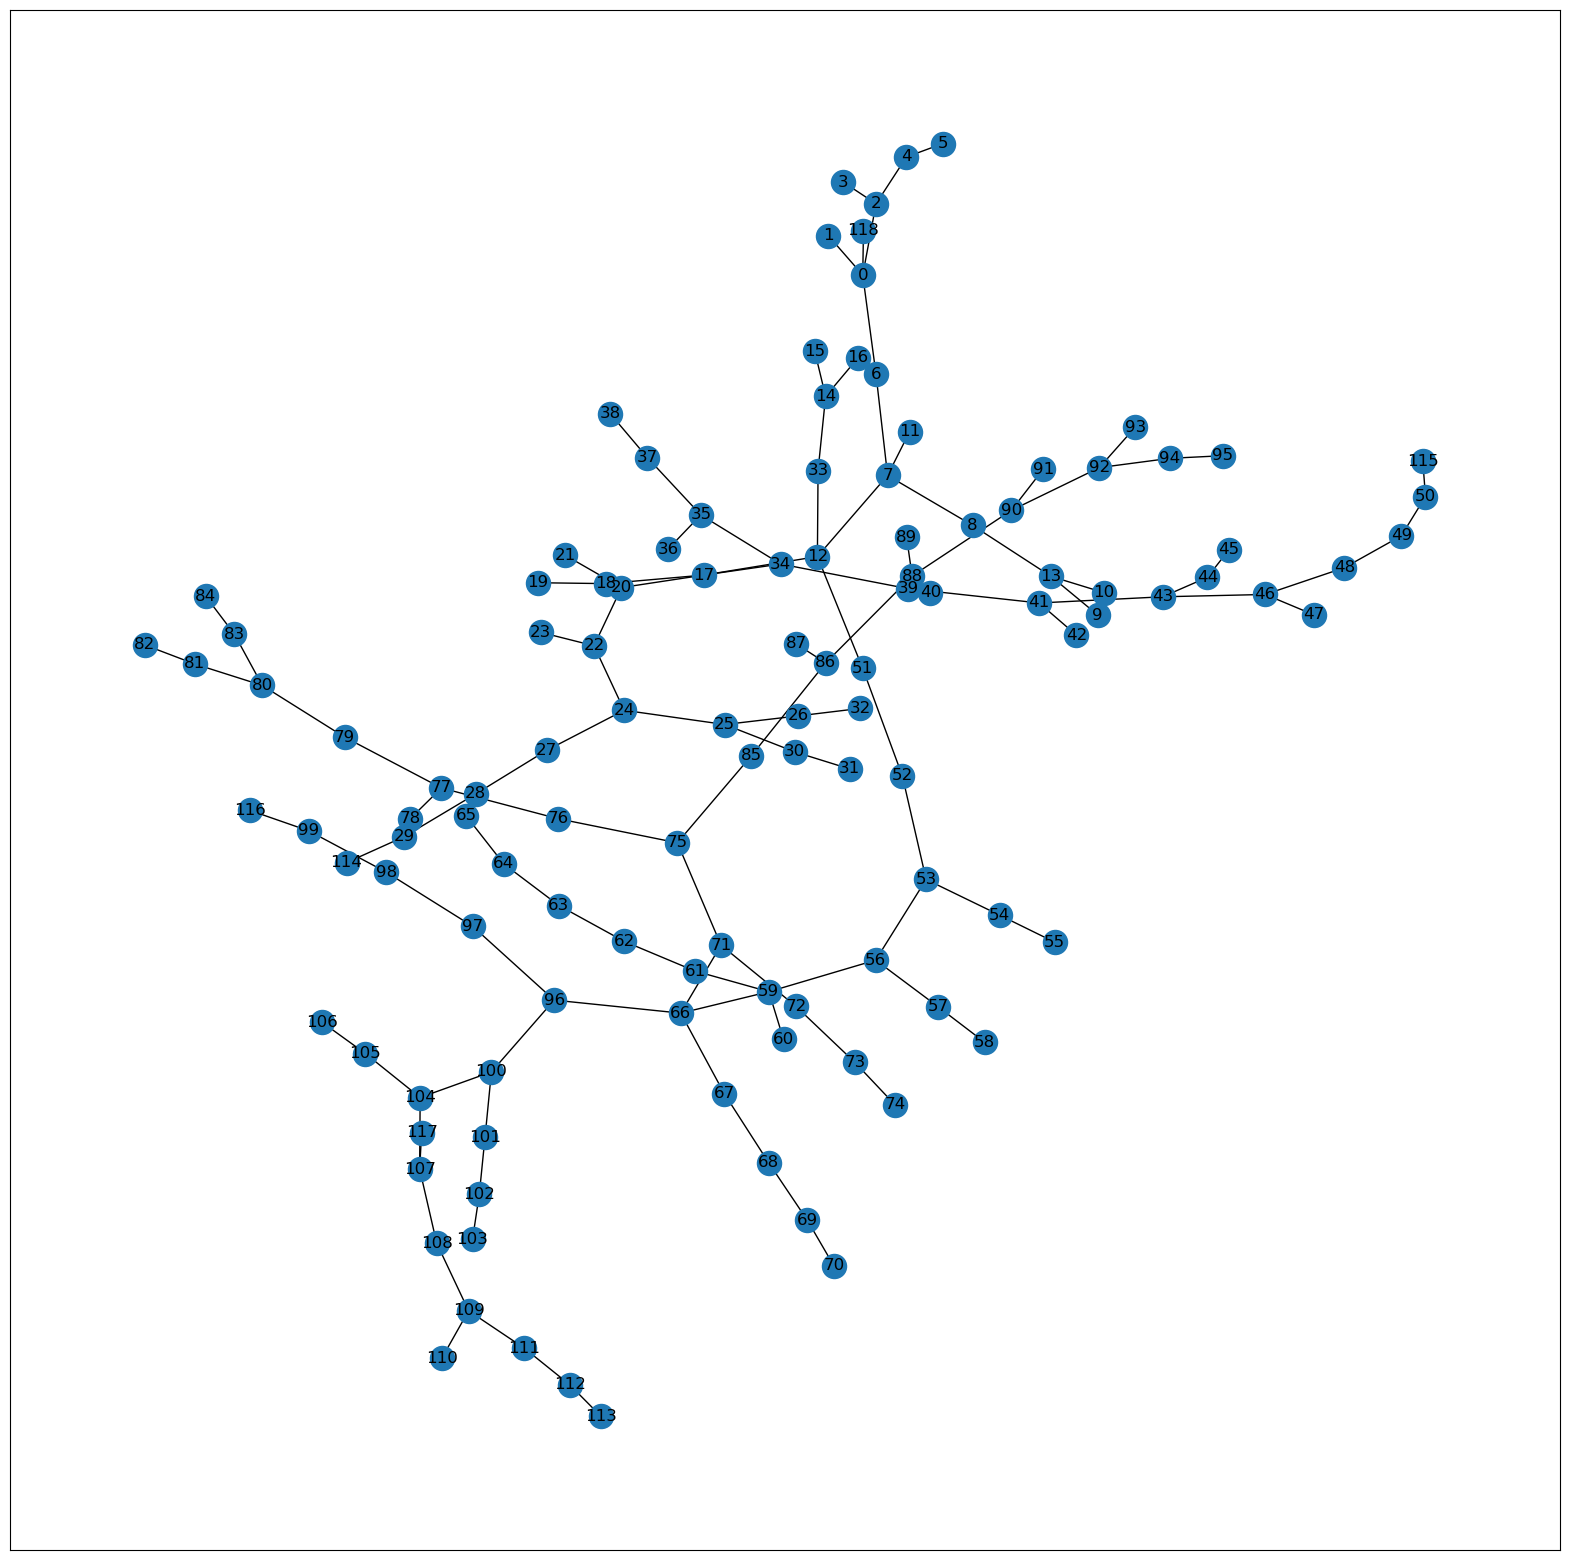

In [51]:
import networkx as nx

edges = [(0, 118),
(0, 1),
(0, 2),
(0, 6),
(2, 3),
(2, 4),
(4, 5),
(6, 7),
(7, 11),
(7, 8),
(7, 12),
(8, 13),
(12, 33),
(12, 17),
(13, 10),
(13, 9),
(14, 15),
(14, 16),
(17, 18),
(17, 20),
(18, 19),
(20, 21),
(20, 22),
(22, 23),
(22, 24),
(24, 25),
(24, 27),
(25, 26),
(25, 30),
(26, 32),
(27, 28),
(28, 29),
(29, 114),
(30, 31),
(33, 14),
(34, 35),
(34, 39),
(35, 36),
(35, 37),
(37, 38),
(39, 40),
(39, 41),
(41, 42),
(41, 43),
(43, 44),
(43, 46),
(44, 45),
(46, 47),
(46, 48),
(48, 49),
(49, 50),
(50, 115),
(51, 52),
(52, 53),
(53, 54),
(53, 56),
(54, 55),
(56, 57),
(56, 59),
(57, 58),
(59, 60),
(59, 61),
(61, 62),
(62, 63),
(63, 64),
(64, 65),
(66, 67),
(66, 71),
(66, 96),
(67, 68),
(68, 69),
(69, 70),
(71, 72),
(71, 75),
(72, 73),
(73, 74),
(75, 76),
(75, 85),
(76, 77),
(77, 78),
(77, 79),
(79, 80),
(80, 81),
(80, 83),
(81, 82),
(83, 84),
(85, 86),
(86, 87),
(86, 88),
(88, 89),
(88, 90),
(90, 91),
(90, 92),
(92, 93),
(92, 94),
(94, 95),
(96, 97),
(97, 98),
(98, 99),
(99, 116),
(96, 100),
(100, 101),
(100, 104),
(101, 102),
(102, 103),
(104, 105),
(104, 107),
(105, 106),
(107, 108),
(107, 117),
(108, 109),
(109, 110),
(109, 111),
(111, 112),
(112, 113),
(17, 34),
(12, 51),
(59, 66)]




plt.figure(figsize=(20, 20))
g = nx.Graph(edges)
nx.draw_networkx(g)
plt.show()

In [43]:
    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [49]:
def hierarchy_pos(G, root, levels=None, width=1., height=1.):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node
       levels: a dictionary
               key: level number (starting from 0)
               value: number of nodes in this level
       width: horizontal space allocated for drawing
       height: vertical space allocated for drawing'''
    TOTAL = "total"
    CURRENT = "current"
    def make_levels(levels, node=root, currentLevel=0, parent=None):
        """Compute the number of nodes for each level
        """
        if not currentLevel in levels:
            levels[currentLevel] = {TOTAL : 0, CURRENT : 0}
        levels[currentLevel][TOTAL] += 1
        neighbors = G.neighbors(node)
        for neighbor in neighbors:
            if not neighbor == parent:
                levels =  make_levels(levels, neighbor, currentLevel + 1, node)
        return levels

    def make_pos(pos, node=root, currentLevel=0, parent=None, vert_loc=0):
        dx = 1/levels[currentLevel][TOTAL]
        left = dx/2
        pos[node] = ((left + dx*levels[currentLevel][CURRENT])*width, vert_loc)
        levels[currentLevel][CURRENT] += 1
        neighbors = G.neighbors(node)
        for neighbor in neighbors:
            if not neighbor == parent:
                pos = make_pos(pos, neighbor, currentLevel + 1, node, vert_loc-vert_gap)
        return pos
    if levels is None:
        levels = make_levels({})
    else:
        levels = {l:{TOTAL: levels[l], CURRENT:0} for l in levels}
    vert_gap = height / (max([l for l in levels])+1)
    return make_pos({})

In [46]:
def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5 ):
    '''If there is a cycle that is reachable from root, then result will not be a hierarchy.

       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
    '''

    def h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5,
                  pos = None, parent = None, parsed = [] ):
        if(root not in parsed):
            parsed.append(root)
            if pos == None:
                pos = {root:(xcenter,vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)
            neighbors = G.neighbors(root)
            if parent != None:
                neighbors.remove(parent)
            if len(neighbors)!=0:
                dx = width/len(neighbors)
                nextx = xcenter - width/2 - dx/2
                for neighbor in neighbors:
                    nextx += dx
                    pos = h_recur(G,neighbor, width = dx, vert_gap = vert_gap,
                                        vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos,
                                        parent = root, parsed = parsed)
        return pos

    return h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5)

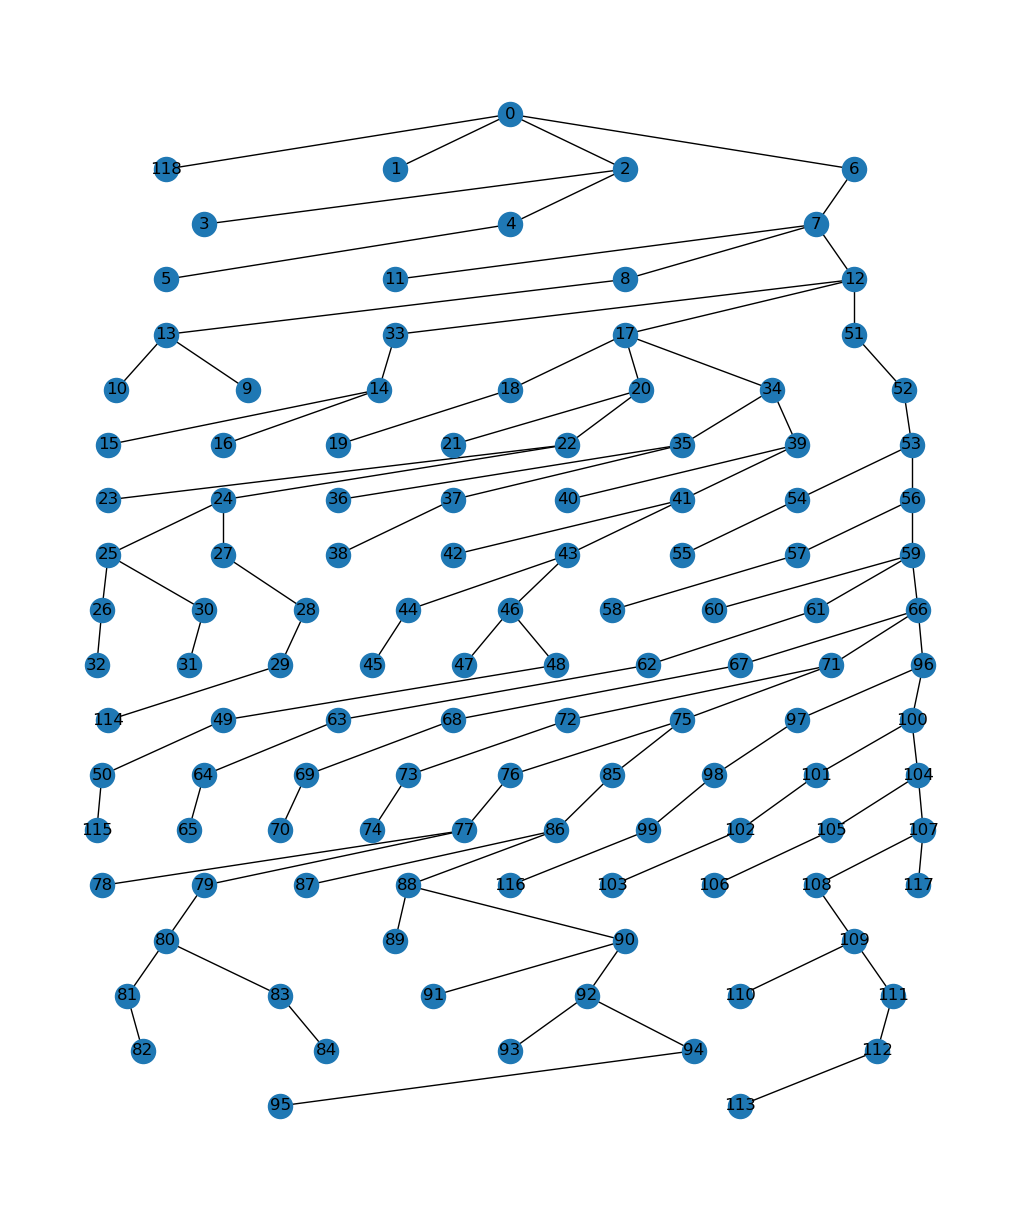

In [50]:
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_edges_from(edges)
pos = hierarchy_pos(G,0)
plt.figure(figsize=(10, 12))
nx.draw(G, pos=pos, with_labels=True)
plt.show()